<a href="https://colab.research.google.com/github/SuprajaGorantla/Machine_Learning/blob/main/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
datafile = pd.read_csv('/content/data.csv')
datafile

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4


In [3]:
# Show the basic statistical description about the data.
df.describe()

,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,164.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,266.379919
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,250.925000
50%,60.000000,105.000000,131.000000,318.600000
75%,60.000000,111.000000,141.000000,387.600000
max,300.000000,159.000000,184.000000,1860.400000


In [5]:
print(datafile.isnull().values.any()) #checking for null values
datafile.fillna(datafile.mean(),inplace=True) #replacing null with mean
print(datafile.isnull().values.any())

True
False


In [6]:
aggregate = datafile.groupby('Duration').agg({'Calories':['min','max','mean','count']})
aggregate

Calories                           
              min     max         mean count
Duration                                    
15           50.5   124.2    87.350000     2
20           50.3   229.4   151.600000     9
25          244.2   244.2   244.200000     1
30           86.2   319.2   192.125000    16
45          100.7   406.0   279.096585    35
60          215.2   486.0   341.046465    79
75          320.4   330.4   325.400000     2
80          643.1   643.1   643.100000     1
90          466.4   700.0   541.800000     8
120         500.0  1000.1   666.833333     3
150         816.0  1115.0   939.400000     4
160         853.0  1034.4   943.700000     2
180         600.1   800.4   733.600000     3
210        1376.0  1860.4  1618.200000     2
270        1729.0  1729.0  1729.000000     1
300        1500.2  1500.2  1500.200000     1

In [8]:
datafile[(datafile['Calories']>=500) & (datafile['Calories']<=1000)]

,Duration,Pulse,Maxpulse,Calories
51,80,123,146,643.1
62,160,109,135,853.0
65,180,90,130,800.4
66,150,105,135,873.4
67,150,107,130,816.0
72,90,100,127,700.0
73,150,97,127,953.2
75,90,98,125,563.2
78,120,100,130,500.4
83,120,100,130,500.0


In [9]:
datafile[(datafile['Calories']>500) & (datafile['Pulse']<100)]

,Duration,Pulse,Maxpulse,Calories
65,180,90,130,800.4
70,150,97,129,1115.0
73,150,97,127,953.2
75,90,98,125,563.2
99,90,93,124,604.1
103,90,90,100,500.4
106,180,90,120,800.3
108,90,90,120,500.3


In [10]:
# Create a new “df_modified” dataframe that contains all the columns from df except for “Maxpulse”
datafile_modified = datafile[['Duration', 'Pulse', 'Calories']]
datafile_modified

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0
...,...,...,...
164,60,105,290.8
165,60,110,300.0
166,60,115,310.2
167,75,120,320.4


In [11]:
# Delete the “Maxpulse” column from the main df dataframe
datafile = datafile.drop('Maxpulse', axis=1)
datafile

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0
...,...,...,...
164,60,105,290.8
165,60,110,300.0
166,60,115,310.2
167,75,120,320.4


In [12]:
datafile['Calories'] = datafile['Calories'].astype('int64')
datafile.dtypes

Duration    int64
Pulse       int64
Calories    int64
dtype: object

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Duration', ylabel='Calories'>

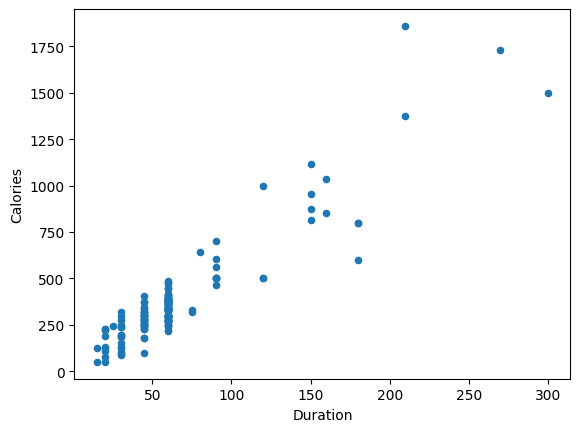

In [14]:
datafile.plot.scatter(x='Duration', y='Calories')

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
train_datafile = pd.read_csv('/content/train.csv')
test_datafile = pd.read_csv('/content/test.csv')
titanic = pd.concat([train_datafile, test_datafile])
titanic_copy = titanic.copy()
titanic_copy['Survived'] = titanic_copy['Survived'].astype('category').cat.codes
titanic_copy['Embarked'] = titanic_copy['Embarked'].astype('category').cat.codes
titanic_copy['Sex'] = titanic_copy['Sex'].astype('category').cat.codes
corr = titanic_copy['Survived'].corr(titanic_copy['Sex'])
corr

-0.2269178484034977

In [17]:
titanic_copy.corr()['Survived']

PassengerId   -0.687207
Survived       1.000000
Pclass        -0.126769
Sex           -0.226918
Age           -0.049620
SibSp          0.012470
Parch          0.028196
Fare           0.081545
Embarked      -0.013303
Name: Survived, dtype: float64

<ipython-input-19-a3bd7c4df246>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
<ipython-input-19-a3bd7c4df246>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(women[women['Survived']==0].A

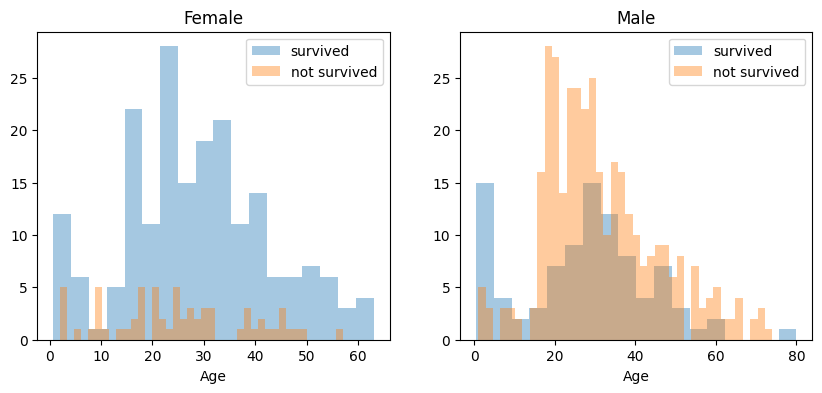

In [19]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
men = titanic[titanic['Sex']=='male']
women = titanic[titanic['Sex']=='female']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

In [20]:
# Do you think we should keep this feature?
'''As age is impacting a lot in the survival rate of male when compared to female I consider to keep this feature. '''

'As age is impacting a lot in the survival rate of male when compared to female I consider to keep this feature. '

<Axes: >

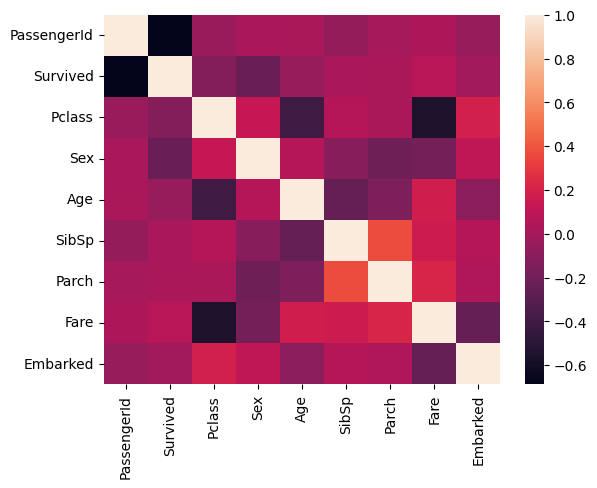

In [27]:
resultdata = titanic_copy.corr()
sns.heatmap(resultdata)

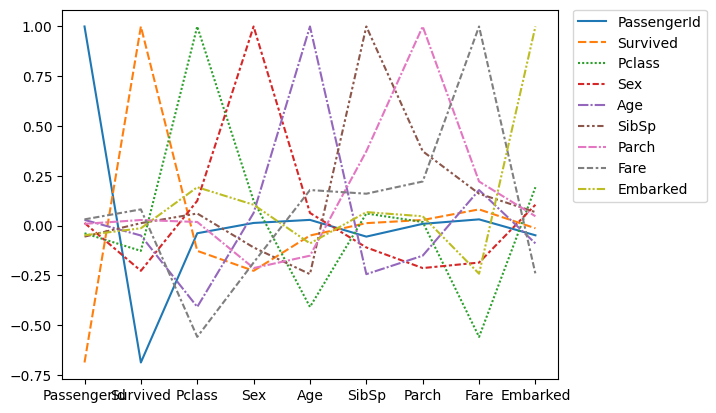

In [28]:
sns.lineplot(resultdata)
plt.legend(bbox_to_anchor=(1.3, 1), loc='upper right', borderaxespad=0)

<Figure size 640x480 with 0 Axes>

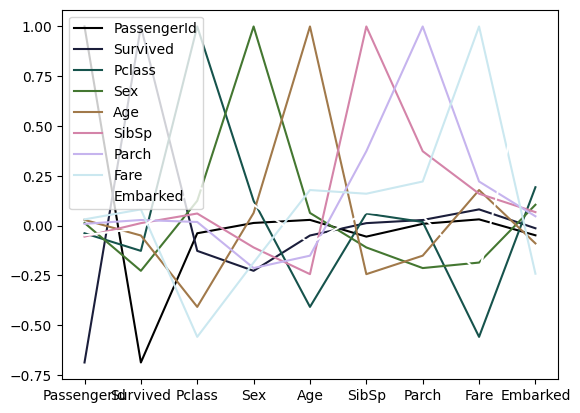

In [29]:
from matplotlib import cm
plt.figure();
corr_data.plot(colormap=cm.cubehelix);

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
titanic_copy = titanic_copy.dropna()
df = titanic_copy.drop(['PassengerId','Name','Ticket','Fare','Cabin'],axis=1)
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

          -1       0.75      0.16      0.26        19
           0       0.44      0.44      0.44         9
           1       0.55      0.85      0.67        27

    accuracy                           0.55        55
   macro avg       0.58      0.48      0.46        55
weighted avg       0.60      0.55      0.49        55

[[ 3  2 14]
 [ 0  4  5]
 [ 1  3 23]]
accuracy is 0.5454545454545454


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
glass = pd.read_csv('/content/glass.csv')
X = glass.iloc[:, :-1].values
y = glass.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print('accuracy is',accuracy_score(y_pred,y_test),'\n\n')
print(classification_report(y_test, y_pred))

accuracy is 0.37209302325581395 


              precision    recall  f1-score   support

           1       0.19      0.44      0.27         9
           2       0.33      0.16      0.21        19
           3       0.33      0.20      0.25         5
           5       0.00      0.00      0.00         2
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         6

    accuracy                           0.37        43
   macro avg       0.42      0.47      0.42        43
weighted avg       0.40      0.37      0.36        43



In [32]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
classifier_1 = SVC()
classifier_1.fit(X_train, y_train)
y_pred_1 = classifier_1.predict(X_test)
print('accuracy is',accuracy_score(y_pred_1,y_test),'\n\n')
print(classification_report(y_test, y_pred_1))

accuracy is 0.20930232558139536 


              precision    recall  f1-score   support

           1       0.21      1.00      0.35         9
           2       0.00      0.00      0.00        19
           3       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         6

    accuracy                           0.21        43
   macro avg       0.03      0.17      0.06        43
weighted avg       0.04      0.21      0.07        43



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

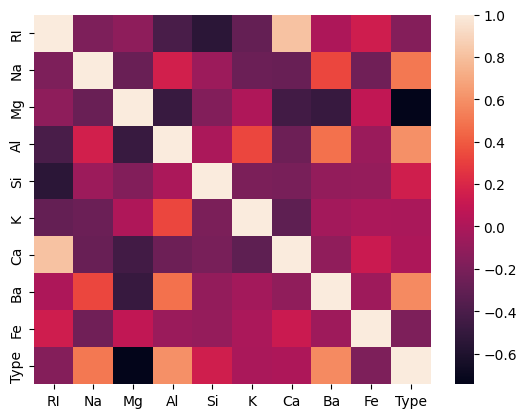

In [33]:
correlation_data = glass.corr()
sns.heatmap(correlation_data)

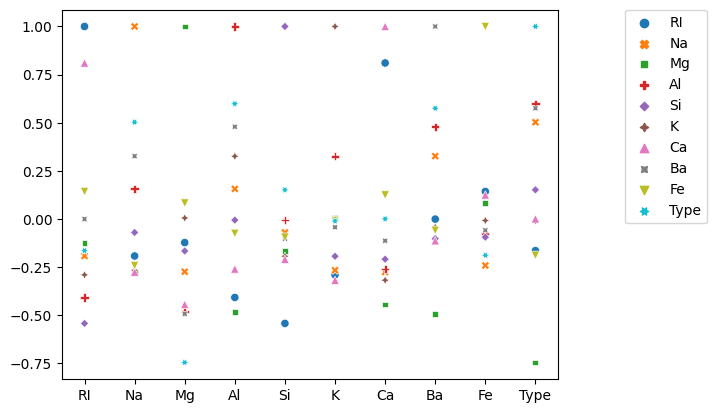

In [34]:
sns.scatterplot(correlation_data)
plt.legend(bbox_to_anchor=(1.3, 1), loc='upper right', borderaxespad=0)